## BEGINNER LEVEL TASK <br>
<br>
Iris Flowers Classification ML Project :

This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.
 
Datasetlink : http://archive.ics.uci.edu/ml/datasets/Iris 

## Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import train_test_split


from sklearn.metrics import classification_report ,confusion_matrix , accuracy_score

### Readind data from given dataset

In [2]:
data =pd.read_csv('iris.data',header=None , names=['sepal length in cm', 'sepal width in cm' , 'petal length in cm' ,'petal width in cm' , 'Flower Name'])

In [3]:
data.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,Flower Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Label Encoding the Flower Name in Target Set 

In [4]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data['Target'] = LE.fit_transform(data['Flower Name'])
data.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,Flower Name,Target
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [5]:
df0 = data[data.Target == 0]
df1 = data[data.Target == 1]
df2 = data[data.Target == 2]

### Visualizing the dataset

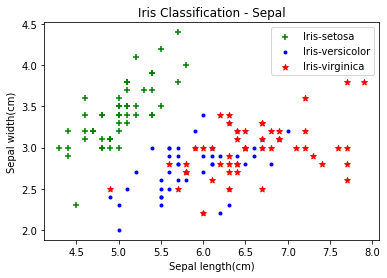

In [6]:
plt.xlabel('Sepal length(cm)')
plt.ylabel('Sepal width(cm)')
plt.title('Iris Classification - Sepal')
plt.scatter(df0['sepal length in cm'],df0['sepal width in cm'],color='green',marker = '+')
plt.scatter(df1['sepal length in cm'],df1['sepal width in cm'],color='blue',marker = '.')
plt.scatter(df2['sepal length in cm'],df2['sepal width in cm'],color='red',marker = '*')
plt.legend(LE.classes_)

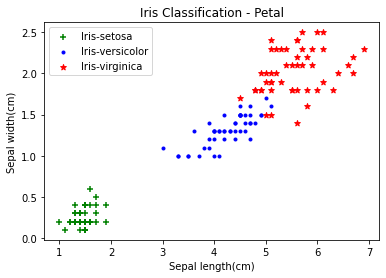

In [7]:
plt.xlabel('Sepal length(cm)')
plt.ylabel('Sepal width(cm)')
plt.title('Iris Classification - Petal')
plt.scatter(df0['petal length in cm'],df0['petal width in cm'],color='green',marker = '+')
plt.scatter(df1['petal length in cm'],df1['petal width in cm'],color='blue',marker = '.')
plt.scatter(df2['petal length in cm'],df2['petal width in cm'],color='red',marker = '*')
plt.legend(LE.classes_)

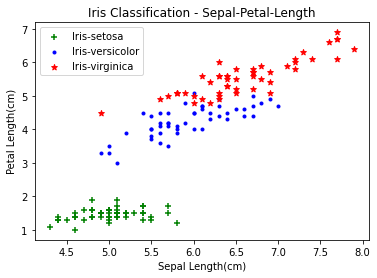

In [8]:
plt.xlabel('Sepal Length(cm)')
plt.ylabel('Petal Length(cm)')
plt.title('Iris Classification - Sepal-Petal-Length')
plt.scatter(df0['sepal length in cm'],df0['petal length in cm'],color='green',marker = '+')
plt.scatter(df1['sepal length in cm'],df1['petal length in cm'],color='blue',marker = '.')
plt.scatter(df2['sepal length in cm'],df2['petal length in cm'],color='red',marker = '*')
plt.legend(LE.classes_)

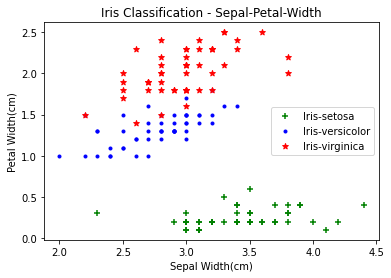

In [9]:
plt.xlabel('Sepal Width(cm)')
plt.ylabel('Petal Width(cm)')
plt.title('Iris Classification - Sepal-Petal-Width')
plt.scatter(df0['sepal width in cm'],df0['petal width in cm'],color='green',marker = '+')
plt.scatter(df1['sepal width in cm'],df1['petal width in cm'],color='blue',marker = '.')
plt.scatter(df2['sepal width in cm'],df2['petal width in cm'],color='red',marker = '*')
plt.legend(LE.classes_)

### Splitting the dataset

In [10]:
X = data.drop(['Flower Name','Target'],axis = 1)
Y = data.Target

In [11]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int32

In [13]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.3)

In [14]:
print('X_train size = ', X_train.shape)
print('X_test size = ', X_test.shape)
print('Y_train size = ', Y_train.shape)
print('Y_test size = ', Y_test.shape)

X_train size =  (105, 4)
X_test size =  (45, 4)
Y_train size =  (105,)
Y_test size =  (45,)


### Appling Models

### K-Nearest Neighbor Classifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
knn.score(X_test,Y_test)

0.9555555555555556

In [17]:
Y_pred_knn = knn.predict(X_test)
cm_knn =confusion_matrix(Y_test,Y_pred_knn)
print("Accuracy KNN Model = " , accuracy_score(Y_test,Y_pred_knn)*100)
cm_knn

Accuracy KNN Model =  95.55555555555556


array([[14,  0,  0],
       [ 0, 18,  1],
       [ 0,  1, 11]], dtype=int64)

Text(0.5, 1.0, 'KNN-Classifier')

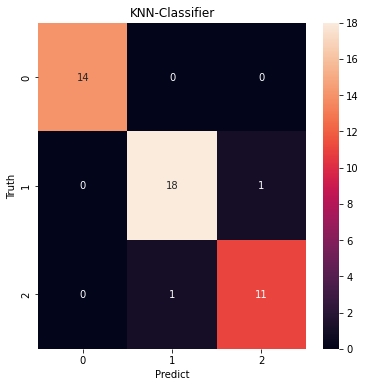

In [18]:
plt.figure(figsize=(6,6))
sns.heatmap(cm_knn, annot=True)
plt.xlabel('Predict')
plt.ylabel('Truth')
plt.title('KNN-Classifier')

In [26]:
print(classification_report(Y_test,Y_pred_knn, target_names=LE.classes_))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.95      0.95      0.95        19
 Iris-virginica       0.92      0.92      0.92        12

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



## Decision Tree

In [19]:
DT = DecisionTreeClassifier()
DT.fit(X_train,Y_train)
DT.score(X_test,Y_test)

0.9333333333333333

In [20]:
Y_pred_DT = DT.predict(X_test)
print("Decision Tree Classifier accuracy(in %):", accuracy_score(Y_test, Y_pred_DT)*100)
cm_DT =confusion_matrix(Y_test,Y_pred_DT)
cm_DT

Decision Tree Classifier accuracy(in %): 93.33333333333333


array([[14,  0,  0],
       [ 0, 18,  1],
       [ 0,  2, 10]], dtype=int64)

Text(0.5, 1.0, 'Decision Tree Classifier')

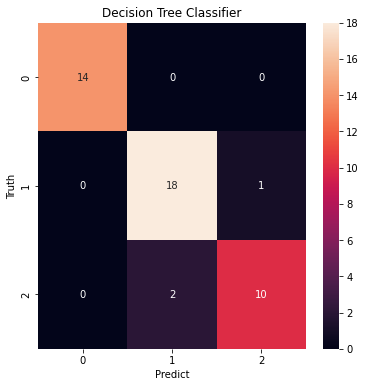

In [21]:
plt.figure(figsize=(6,6))
sns.heatmap(cm_DT, annot=True)
plt.xlabel('Predict')
plt.ylabel('Truth')
plt.title('Decision Tree Classifier')

In [27]:
print(classification_report(Y_test,Y_pred_DT, target_names=LE.classes_))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.90      0.95      0.92        19
 Iris-virginica       0.91      0.83      0.87        12

       accuracy                           0.93        45
      macro avg       0.94      0.93      0.93        45
   weighted avg       0.93      0.93      0.93        45



## SVM

In [22]:
svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(X_train, Y_train)

SVC(kernel='linear', random_state=0)

In [25]:
Y_pred_svm = svm.predict(X_test)
print("SVM accuracy(in %):", accuracy_score(Y_test, Y_pred_svm)*100)
cm_svm =confusion_matrix(Y_test,Y_pred_svm)
cm_svm

SVM accuracy(in %): 100.0


array([[14,  0,  0],
       [ 0, 19,  0],
       [ 0,  0, 12]], dtype=int64)

Text(0.5, 1.0, 'SVM')

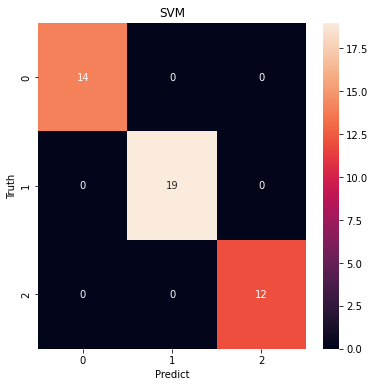

In [24]:
plt.figure(figsize=(6,6))
sns.heatmap(cm_svm, annot=True)
plt.xlabel('Predict')
plt.ylabel('Truth')
plt.title('SVM')

In [28]:
print(classification_report(Y_test,Y_pred_svm, target_names=LE.classes_))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00        19
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

